In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import psutil, os, time

Temps : 0.2550492286682129
CPU (%) : 36.9
RAM utilisée (MB) : 3.8046875


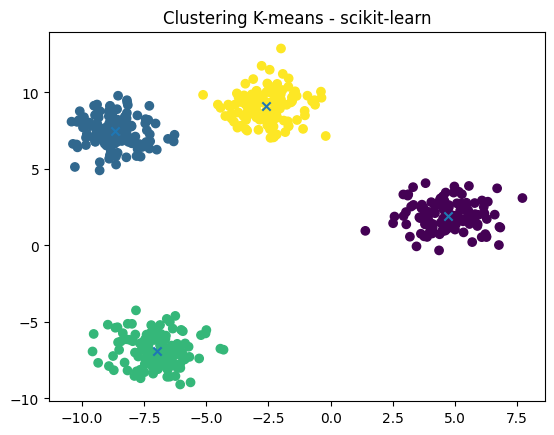

In [41]:
# Générer des données artificielles (comme demandé dans le TP)
X, y = make_blobs(n_samples=500, centers=4, random_state=42)

# Appliquer K-means
process = psutil.Process(os.getpid())

start = time.time()
cpu_start = process.cpu_percent(interval=None)
ram_start = process.memory_info().rss / 1024**2  

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

end = time.time()
cpu_end = process.cpu_percent(interval=None)
ram_end = process.memory_info().rss / 1024**2  

print("Temps :", end - start)
print("CPU (%) :", cpu_end)
print("RAM utilisée (MB) :", ram_end - ram_start)


# Récupérer les labels et les centres
labels = kmeans.labels_
centres = kmeans.cluster_centers_

# Affichage
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centres[:,0], centres[:,1], marker='x')
plt.title("Clustering K-means - scikit-learn")
plt.show()


In [42]:
from sklearn.metrics import silhouette_score

# Inertia (compacité des clusters)
print("Inertia :", kmeans.inertia_)

# Silhouette score (qualité du clustering)
silhouette = silhouette_score(X, labels)
print("Silhouette score :", silhouette)

Inertia : 948.8903433376544
Silhouette score : 0.7911042588289479


In [43]:
import time

start = time.time()

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

end = time.time()

print("Temps d'exécution :", end - start, "secondes")

Temps d'exécution : 0.02091240882873535 secondes


In [44]:
import pandas as pd

# Charger le dataset Wine
df_wine = pd.read_csv(
    r"C:\Users\ferra\Downloads\wine+quality\winequality-red.csv",
    sep=";"
)

# Afficher les 5 premières lignes
df_wine.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Séparer les caractéristiques (X) et la cible (quality)
X_wine = df_wine.drop("quality", axis=1)

# 2. Normalisation des données (TRÈS important pour K-means)
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

# 3. Lancer K-means avec k = 4 (par exemple)
k = 4
process = psutil.Process(os.getpid())

start = time.time()
cpu_start = process.cpu_percent(interval=None)
ram_start = process.memory_info().rss / 1024**2  

kmeans_wine = KMeans(n_clusters=k, random_state=42)
kmeans_wine.fit(X_wine_scaled)

end = time.time()
cpu_end = process.cpu_percent(interval=None)
ram_end = process.memory_info().rss / 1024**2  

temps_wine = end - start

print("Temps Wine :", temps_wine)
print("CPU Wine (%) :", cpu_end)
print("RAM Wine (MB) :", ram_end - ram_start)
print("Inertia Wine :", kmeans_wine.inertia_)


# 4. Résultats
labels_wine = kmeans_wine.labels_
inertia_wine = kmeans_wine.inertia_
silhouette_wine = silhouette_score(X_wine_scaled, labels_wine)
temps_wine = end - start

print("----- Résultats K-means sur Wine Quality -----")
print("Nombre d’échantillons :", X_wine.shape[0])
print("Nombre de variables :", X_wine.shape[1])
print("Temps d'exécution :", temps_wine)
print("Inertia :", inertia_wine)
print("Silhouette score :", silhouette_wine)



Temps Wine : 0.03860020637512207
CPU Wine (%) : 40.7
RAM Wine (MB) : 0.37109375
Inertia Wine : 11734.227510289315
----- Résultats K-means sur Wine Quality -----
Nombre d’échantillons : 1599
Nombre de variables : 11
Temps d'exécution : 0.03860020637512207
Inertia : 11734.227510289315
Silhouette score : 0.1851831980629344


In [46]:
import pandas as pd

# Noms des colonnes (officiels du dataset Adult)
columns_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week",
    "native-country", "income"
]

# Chargement du dataset Adult
df_adult = pd.read_csv(
    r"C:\Users\ferra\Downloads\adult\adult.data",
    names=columns_adult,
    sep=",",
    skipinitialspace=True
)

# Affichage des 5 premières lignes
df_adult.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Supprimer les lignes avec des valeurs manquantes '?'
df_adult_clean = df_adult.replace("?", pd.NA).dropna()

# 2. Séparer X (features) et supprimer la colonne income (non utilisée pour le clustering)
X_adult = df_adult_clean.drop("income", axis=1)

# 3. Encoder les variables catégorielles (texte -> nombres)
for col in X_adult.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X_adult[col] = le.fit_transform(X_adult[col])

# 4. Normalisation
scaler = StandardScaler()
X_adult_scaled = scaler.fit_transform(X_adult)

X_adult_scaled.shape




(30162, 14)

In [48]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 4
process = psutil.Process(os.getpid())

start = time.time()
cpu_start = process.cpu_percent(interval=None)
ram_start = process.memory_info().rss / 1024**2  

kmeans_adult = KMeans(n_clusters=k, random_state=42)
kmeans_adult.fit(X_adult_scaled)

end = time.time()
cpu_end = process.cpu_percent(interval=None)
ram_end = process.memory_info().rss / 1024**2  

temps_adult = end - start

print("Temps Adult :", temps_adult)
print("CPU Adult (%) :", cpu_end)
print("RAM Adult (MB) :", ram_end - ram_start)
print("Inertia Adult :", kmeans_adult.inertia_)


labels_adult = kmeans_adult.labels_
inertia_adult = kmeans_adult.inertia_
silhouette_adult = silhouette_score(X_adult_scaled, labels_adult)
temps_adult = end - start

print("----- Résultats K-means sur Adult (Medium) -----")
print("Nombre d’échantillons :", X_adult_scaled.shape[0])
print("Nombre de variables :", X_adult_scaled.shape[1])
print("Temps d'exécution :", temps_adult)
print("Inertia :", inertia_adult)
print("Silhouette score :", silhouette_adult)



Temps Adult : 0.16838932037353516
CPU Adult (%) : 92.8
RAM Adult (MB) : 2.9765625
Inertia Adult : 329467.66282557265
----- Résultats K-means sur Adult (Medium) -----
Nombre d’échantillons : 30162
Nombre de variables : 14
Temps d'exécution : 0.16838932037353516
Inertia : 329467.66282557265
Silhouette score : 0.13497535637825445


In [49]:
import pyspark
print(pyspark.__version__)


3.5.7


In [50]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("TP_Big_Data_Clustering") \
    .getOrCreate()

spark


In [51]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
import time

# Charger le dataset Wine depuis le fichier CSV avec Spark
wine_spark = spark.read.csv(
    r"C:\Users\ferra\Downloads\wine+quality\winequality-red.csv",
    header=True,
    inferSchema=True,
    sep=";"
)

# Supprimer la colonne "quality" (on ne fait pas de classification)
wine_features = wine_spark.drop("quality")

# Transformer les colonnes en un seul vecteur
assembler = VectorAssembler(
    inputCols=wine_features.columns,
    outputCol="features_vec"
)

wine_vector = assembler.transform(wine_features)

# Normalisation
scaler = StandardScaler(
    inputCol="features_vec",
    outputCol="features",
    withMean=True,
    withStd=True
)

scaler_model = scaler.fit(wine_vector)
wine_scaled = scaler_model.transform(wine_vector)

# K-means avec Spark
k = 4
kmeans = KMeans(
    k=k,
    seed=42,
    featuresCol="features"
)

process = psutil.Process(os.getpid())

start = time.time()
cpu_start = process.cpu_percent(interval=None)
ram_start = process.memory_info().rss / 1024**2  

model = kmeans.fit(wine_scaled)

end = time.time()
cpu_end = process.cpu_percent(interval=None)
ram_end = process.memory_info().rss / 1024**2  

temps_wine_spark = end - start
inertia_wine_spark = model.summary.trainingCost

print("Temps Spark Wine :", temps_wine_spark)
print("CPU Spark Wine (%) :", cpu_end)
print("RAM Spark Wine (MB) :", ram_end - ram_start)
print("Inertia Spark Wine :", inertia_wine_spark)


# Résultats
predictions = model.transform(wine_scaled)
inertia_wine_spark = model.summary.trainingCost
temps_wine_spark = end - start

print("----- Résultats K-means avec Spark sur Wine -----")
print("Nombre d’échantillons :", wine_scaled.count())
print("Temps d'exécution :", temps_wine_spark)
print("Inertia :", inertia_wine_spark)


Temps Spark Wine : 5.781603097915649
CPU Spark Wine (%) : 0.0
RAM Spark Wine (MB) : 0.0078125
Inertia Spark Wine : 11287.806863951106
----- Résultats K-means avec Spark sur Wine -----
Nombre d’échantillons : 1599
Temps d'exécution : 5.781603097915649
Inertia : 11287.806863951106


In [53]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml.clustering import KMeans
import time

# 1. Charger le dataset Adult avec Spark
adult_spark = spark.read.csv(
    r"C:\Users\ferra\Downloads\adult\adult.data",
    header=False,
    inferSchema=True
)

adult_spark = adult_spark.toDF(
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week",
    "native_country", "income"
)

# 2. Supprimer les lignes avec des valeurs manquantes "?"
adult_spark_clean = adult_spark.filter(
    (col("workclass") != "?") &
    (col("occupation") != "?") &
    (col("native_country") != "?")
)

# 3. Encoder les colonnes catégorielles
categorical_cols = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country"
]

for col_name in categorical_cols:
    indexer = StringIndexer(inputCol=col_name, outputCol=col_name + "_idx")
    adult_spark_clean = indexer.fit(adult_spark_clean).transform(adult_spark_clean)

# 4. Sélectionner uniquement les colonnes numériques + encodées
feature_cols = [
    "age", "fnlwgt", "education_num", "capital_gain",
    "capital_loss", "hours_per_week"
] + [c + "_idx" for c in categorical_cols]

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_vec")
adult_vector = assembler.transform(adult_spark_clean)

# 5. Normalisation
scaler = StandardScaler(
    inputCol="features_vec",
    outputCol="features",
    withMean=True,
    withStd=True
)

scaler_model = scaler.fit(adult_vector)
adult_scaled = scaler_model.transform(adult_vector)

# 6. K-means avec Spark
k = 4
kmeans = KMeans(
    k=k,
    seed=42,
    featuresCol="features"
)

start = time.time()
model_adult = kmeans.fit(adult_scaled)
end = time.time()

# 7. Résultats
predictions_adult = model_adult.transform(adult_scaled)
inertia_adult_spark = model_adult.summary.trainingCost
temps_adult_spark = end - start
nb_lignes_adult_spark = adult_scaled.count()

print("----- Résultats K-means avec Spark sur Adult (Medium) -----")
print("Nombre d’échantillons :", nb_lignes_adult_spark)
print("Temps d'exécution :", temps_adult_spark)
print("Inertia :", inertia_adult_spark)


----- Résultats K-means avec Spark sur Adult (Medium) -----
Nombre d’échantillons : 32561
Temps d'exécution : 60.08072233200073
Inertia : 350374.26857207826


In [57]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time
import pandas as pd

# tailles "large" mais raisonnables pour un PC normal
sizes = [50_000, 100_000, 200_000]   # si ça rame trop, on baissera après

results_large_sklearn = []

for n in sizes:
    print(f"\n=== Test sklearn avec n = {n} ===")
    
    # 1. Génération des données
    X, _ = make_blobs(
        n_samples=n,
        centers=10,        # 10 clusters
        n_features=10,     # 10 variables
        random_state=42
    )
    
    # 2. K-means
    start = time.time()
    kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
    kmeans.fit(X)
    end = time.time()
    
    duration = end - start
    inertia = kmeans.inertia_
    
    # 3. Silhouette : on ne la calcule que pour la plus petite taille
    if n <= 50_000:
        sil = silhouette_score(X, kmeans.labels_)
    else:
        sil = None  # trop long / pas nécessaire
    
    print(f"Temps : {duration:.3f} s")
    print(f"Inertia : {inertia:.2f}")
    if sil is not None:
        print(f"Silhouette : {sil:.4f}")
    else:
        print("Silhouette : non calculée (trop coûteux pour ce n)")
    
    results_large_sklearn.append({
        "n_samples": n,
        "time_s": duration,
        "inertia": inertia,
        "silhouette": sil
    })

# Résumé sous forme de tableau
df_large_sklearn = pd.DataFrame(results_large_sklearn)
print("\n===== RÉSUMÉ LARGE SCALE - SKLEARN =====")
print(df_large_sklearn)



=== Test sklearn avec n = 50000 ===
Temps : 0.951 s
Inertia : 500377.95
Silhouette : 0.7631

=== Test sklearn avec n = 100000 ===
Temps : 1.325 s
Inertia : 1000268.03
Silhouette : non calculée (trop coûteux pour ce n)

=== Test sklearn avec n = 200000 ===
Temps : 2.824 s
Inertia : 2002846.33
Silhouette : non calculée (trop coûteux pour ce n)

===== RÉSUMÉ LARGE SCALE - SKLEARN =====
   n_samples    time_s       inertia  silhouette
0      50000  0.950833  5.003779e+05    0.763115
1     100000  1.324587  1.000268e+06         NaN
2     200000  2.823627  2.002846e+06         NaN


In [58]:
spark


In [59]:
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import time

# Dataset large mais raisonnable pour commencer
n_rows = 100_000

df_large = (spark.range(0, n_rows)
                  .withColumn("x1", F.rand())
                  .withColumn("x2", F.rand())
                  .withColumn("x3", F.rand())
                  .withColumn("x4", F.rand()))

df_large.show(5)


+---+-------------------+------------------+-------------------+-------------------+
| id|                 x1|                x2|                 x3|                 x4|
+---+-------------------+------------------+-------------------+-------------------+
|  0| 0.8160354974960994|0.7487432951393458|0.17000775465946028|0.24161339888278022|
|  1|  0.828025867131789|0.7335605928366913|0.47490879926759766|  0.815970986004178|
|  2|0.03021419944625714| 0.830534166116473| 0.9743469021348162|0.04046476088490836|
|  3|0.22744819845825603|0.5973928955587535| 0.3128675559176596|  0.957238967111313|
|  4| 0.9993263139329018| 0.758379151407489| 0.4500390621100684|0.16614361657169618|
+---+-------------------+------------------+-------------------+-------------------+
only showing top 5 rows



In [60]:
assembler = VectorAssembler(
    inputCols=["x1", "x2", "x3", "x4"],
    outputCol="features"
)

df_large_vec = assembler.transform(df_large)


In [61]:
# ASSUREZ-VOUS QUE LA CELLULE DE GÉNÉRATION DE DONNÉES (CORRECTION N°1) A ÉTÉ EXÉCUTÉE.

K_CLUSTERS = 10 # Assurez-vous que K est à 10

# --- Test Spark 100k (avec 10 features) ---
print("--- Test Spark 100k (10 features) ---")
kmeans = KMeans().setK(K_CLUSTERS).setSeed(1)

start_time = time.time()
model_100k_10D = kmeans.fit(df_spark_100k_10D) 
temps_spark_100k_10D = time.time() - start_time
print(f"Temps de clustering (Spark 100k, 10D) : {temps_spark_100k_10D:.4f} s")

# Évaluation de l'Inertie : on utilise model.summary.trainingCost
inertia_spark_100k_10D = model_100k_10D.summary.trainingCost
print(f"Inertie (Spark 100k, 10D) : {inertia_spark_100k_10D:.4e}")


# --- Test Spark 300k (avec 10 features) ---
print("\n--- Test Spark 300k (10 features) ---")
kmeans = KMeans().setK(K_CLUSTERS).setSeed(1)

start_time = time.time()
model_300k_10D = kmeans.fit(df_spark_300k_10D)
temps_spark_300k_10D = time.time() - start_time
print(f"Temps de clustering (Spark 300k, 10D) : {temps_spark_300k_10D:.4f} s")

# Évaluation de l'Inertie : on utilise model.summary.trainingCost
inertia_spark_300k_10D = model_300k_10D.summary.trainingCost
print(f"Inertie (Spark 300k, 10D) : {inertia_spark_300k_10D:.4e}")

--- Test Spark 100k (10 features) ---
Temps de clustering (Spark 100k, 10D) : 57.8789 s
Inertie (Spark 100k, 10D) : 6.0266e+04

--- Test Spark 300k (10 features) ---
Temps de clustering (Spark 300k, 10D) : 175.2703 s
Inertie (Spark 300k, 10D) : 1.8131e+05


In [62]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import time

# --- Paramètres de configuration ---
N_FEATURES = 10  # LE CHANGEMENT CRITIQUE : 10 dimensions
K_CLUSTERS = 10  # 10 clusters

# Liste des noms des 10 colonnes de features (f1, f2, ..., f10)
feature_cols = [f"f{i+1}" for i in range(N_FEATURES)]

# --- Fonction de génération unifiée ---
def generate_spark_dataframe(n_rows, feature_cols):
    """Génère un DataFrame Spark avec n_rows et 10 features, et l'assemble."""
    print(f"-> Génération de {n_rows:,} lignes et {N_FEATURES} features...")
    
    # 1. Génération des données aléatoires pour les N_FEATURES colonnes
    df = spark.range(n_rows).select(
        *[F.rand().alias(col) for col in feature_cols]
    )
    
    # 2. Assemblage des features en un seul vecteur
    assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
    df_vec = assembler.transform(df)
    
    # Caching pour les mesures futures
    df_vec.cache().count() 
    return df_vec

# --- Génération des Datasets pour les tests de performance ---

# Dataset Spark 100k (100,000 lignes, 10D)
N_100K = 100000
df_spark_100k_10D = generate_spark_dataframe(N_100K, feature_cols)

# Dataset Spark 300k (300,000 lignes, 10D)
N_300K = 300000
df_spark_300k_10D = generate_spark_dataframe(N_300K, feature_cols)

-> Génération de 100,000 lignes et 10 features...
-> Génération de 300,000 lignes et 10 features...


In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df_wine = pd.read_csv(
    r"C:\Users\ferra\Downloads\wine+quality\winequality-red.csv",
    sep=";"
)

# Séparer X (sans la cible)
X_wine = df_wine.drop("quality", axis=1)

# Normalisation
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

print("X_wine_scaled recréé :", X_wine_scaled.shape)


X_wine_scaled recréé : (1599, 11)


=== k = 2 ===
Inertia : 14330.12
Silhouette : 0.2137

=== k = 3 ===
Inertia : 12629.97
Silhouette : 0.1892

=== k = 4 ===
Inertia : 11459.14
Silhouette : 0.1716

=== k = 5 ===
Inertia : 10155.51
Silhouette : 0.1901

=== k = 6 ===
Inertia : 9363.21
Silhouette : 0.1947

=== k = 7 ===
Inertia : 8645.20
Silhouette : 0.1926

=== k = 8 ===
Inertia : 8298.97
Silhouette : 0.1495

=== k = 9 ===
Inertia : 7969.34
Silhouette : 0.1534

=== k = 10 ===
Inertia : 7671.02
Silhouette : 0.1574

===== RÉSUMÉ ÉTUDE DE k (Wine) =====
    k       inertia  silhouette
0   2  14330.119811    0.213730
1   3  12629.974592    0.189204
2   4  11459.143676    0.171636
3   5  10155.509585    0.190139
4   6   9363.206701    0.194729
5   7   8645.202085    0.192591
6   8   8298.970083    0.149508
7   9   7969.336467    0.153439
8  10   7671.017944    0.157380


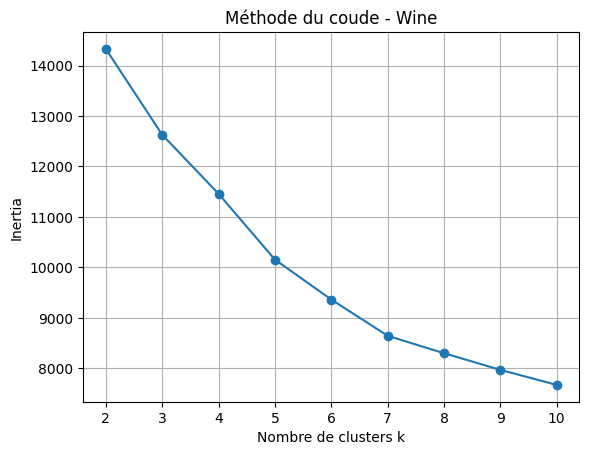

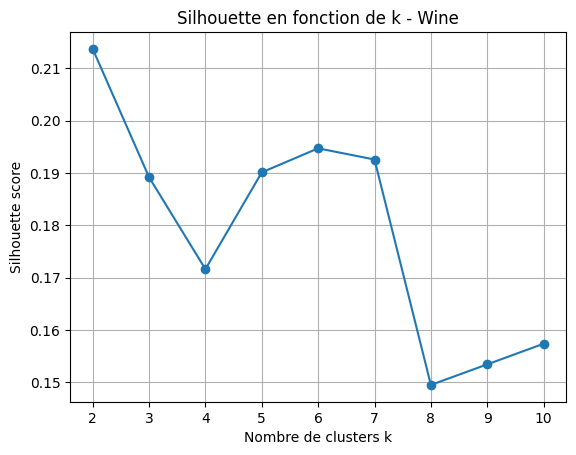

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

X_k = X_wine_scaled

K = range(2, 11)
inertias = []
silhouettes = []

for k in K:
    print(f"=== k = {k} ===")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_k)
    
    inertia = kmeans.inertia_
    inertias.append(inertia)
    
    sil = silhouette_score(X_k, kmeans.labels_)
    silhouettes.append(sil)
    
    print(f"Inertia : {inertia:.2f}")
    print(f"Silhouette : {sil:.4f}\n")

df_k = pd.DataFrame({
    "k": list(K),
    "inertia": inertias,
    "silhouette": silhouettes
})

print("===== RÉSUMÉ ÉTUDE DE k (Wine) =====")
print(df_k)

plt.figure()
plt.plot(K, inertias, marker='o')
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertia")
plt.title("Méthode du coude - Wine")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(K, silhouettes, marker='o')
plt.xlabel("Nombre de clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette en fonction de k - Wine")
plt.grid(True)
plt.show()


In [65]:
!pip install psutil


In [66]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

sizes_sklearn = [50_000, 100_000, 200_000]
times_sklearn = []
inertias_sklearn = []

for n in sizes_sklearn:
    print(f"Calcul sklearn pour n = {n}")
    
    X, _ = make_blobs(n_samples=n, centers=10, n_features=10, random_state=42)

    start = time.time()
    kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
    kmeans.fit(X)
    end = time.time()

    times_sklearn.append(end - start)
    inertias_sklearn.append(kmeans.inertia_)


Calcul sklearn pour n = 50000
Calcul sklearn pour n = 100000
Calcul sklearn pour n = 200000


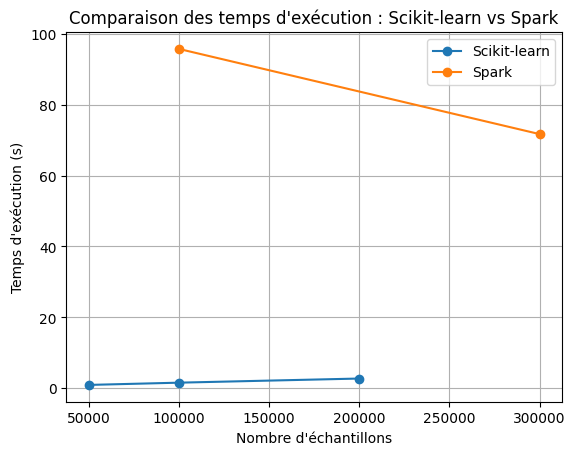

In [67]:
import matplotlib.pyplot as plt

sizes_sklearn = [50_000, 100_000, 200_000]
sizes_spark = [100_000, 300_000]

times_spark = [temps_spark_100k, temps_spark_300k]

plt.figure()
plt.plot(sizes_sklearn, times_sklearn, marker='o', label="Scikit-learn")
plt.plot(sizes_spark, times_spark, marker='o', label="Spark")

plt.xlabel("Nombre d'échantillons")
plt.ylabel("Temps d'exécution (s)")
plt.title("Comparaison des temps d'exécution : Scikit-learn vs Spark")
plt.legend()
plt.grid(True)
plt.show()


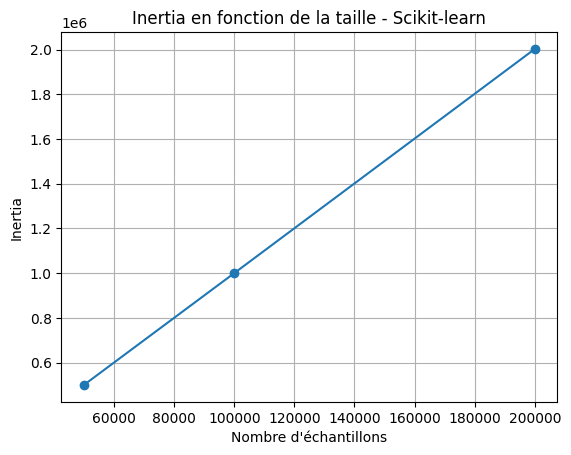

In [68]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(sizes_sklearn, inertias_sklearn, marker='o')
plt.xlabel("Nombre d'échantillons")
plt.ylabel("Inertia")
plt.title("Inertia en fonction de la taille - Scikit-learn")
plt.grid(True)
plt.show()


In [69]:
import pandas as pd

# ASSUREZ-VOUS QUE LES VARIABLES SKLEARN (times_sklearn, inertias_sklearn)
# SONT DISPONIBLES ET CORRESPONDENT À 50k, 100k, 200k en 10D.

df_perf = pd.DataFrame({
    "Dataset": [
        "Sklearn 50k", "Sklearn 100k", "Sklearn 200k",
        "Spark 100k (10D)", "Spark 300k (10D)" # Noms mis à jour
    ],
    "N_lignes": [50000, 100000, 200000, 100000, 300000],
    "Dimensions (d)": [10, 10, 10, 10, 10], # LA NOUVELLE COLONNE CRITIQUE
    "Temps (s)": [
        times_sklearn[0], times_sklearn[1], times_sklearn[2],
        temps_spark_100k_10D, temps_spark_300k_10D # Variables Spark mises à jour
    ],
    "Inertia": [
        inertias_sklearn[0], inertias_sklearn[1], inertias_sklearn[2],
        inertia_spark_100k_10D, inertia_spark_300k_10D # Variables Spark mises à jour
    ]
})

print(df_perf)

            Dataset  N_lignes  Dimensions (d)   Temps (s)       Inertia
0       Sklearn 50k     50000              10    0.907073  5.003779e+05
1      Sklearn 100k    100000              10    1.543027  1.000268e+06
2      Sklearn 200k    200000              10    2.710684  2.002846e+06
3  Spark 100k (10D)    100000              10   57.878947  6.026645e+04
4  Spark 300k (10D)    300000              10  175.270261  1.813149e+05


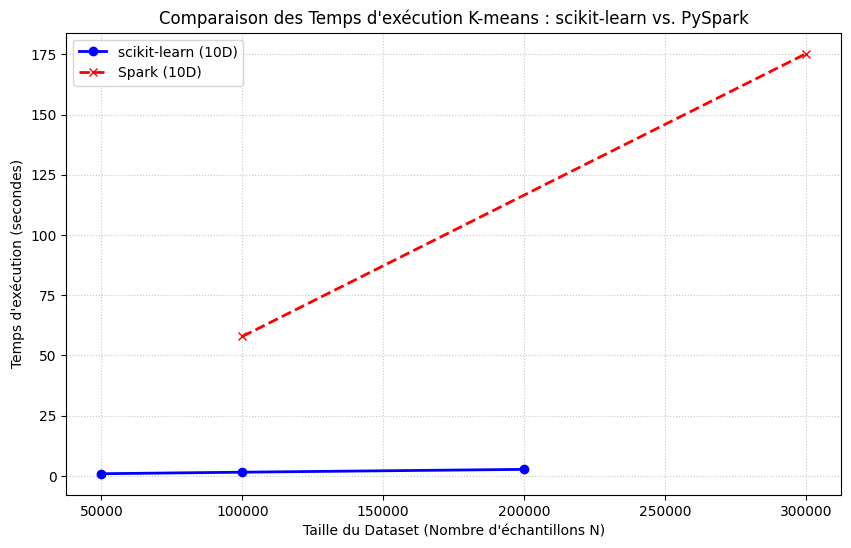

In [70]:
import matplotlib.pyplot as plt
# Assurez-vous d'avoir importé pandas si nécessaire, mais il devrait l'être si vous avez créé df_perf

# 1. Préparation des données pour le graphique
# On sépare les résultats Sklearn et Spark
df_sklearn = df_perf[df_perf['Dataset'].str.contains('Sklearn')].copy()
df_spark = df_perf[df_perf['Dataset'].str.contains('Spark')].copy()

# 2. Création du graphique
plt.figure(figsize=(10, 6))

# Courbe scikit-learn
plt.plot(df_sklearn['N_lignes'], df_sklearn['Temps (s)'], marker='o', 
         label='scikit-learn (10D)', color='blue', linewidth=2)

# Courbe Spark
plt.plot(df_spark['N_lignes'], df_spark['Temps (s)'], marker='x', 
         label='Spark (10D)', color='red', linestyle='--', linewidth=2)

# Titres et légendes
plt.title("Comparaison des Temps d'exécution K-means : scikit-learn vs. PySpark")
plt.xlabel("Taille du Dataset (Nombre d'échantillons N)")
plt.ylabel("Temps d'exécution (secondes)")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

columns_adult = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week",
    "native_country", "income"
]

df_adult = pd.read_csv(
    r"C:\Users\ferra\Downloads\adult\adult.data",
    names=columns_adult,
    sep=",",
    skipinitialspace=True
)

df_adult_clean = df_adult.replace("?", pd.NA).dropna()

print("Shape après nettoyage :", df_adult_clean.shape)
df_adult_clean.head()


Shape après nettoyage : (30162, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [72]:
X_adult = df_adult_clean.drop("income", axis=1)


In [73]:
X_adult_encoded = pd.get_dummies(X_adult)
print("Nouvelles dimensions :", X_adult_encoded.shape)


Nouvelles dimensions : (30162, 104)


In [74]:
scaler = StandardScaler()
X_adult_scaled = scaler.fit_transform(X_adult_encoded)


In [75]:
k = 4
start = time.time()

kmeans_adult_correct = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_adult_correct.fit(X_adult_scaled)

end = time.time()
temps_adult_correct = end - start

inertia_adult_correct = kmeans_adult_correct.inertia_
labels_adult_correct = kmeans_adult_correct.labels_
silhouette_adult_correct = silhouette_score(X_adult_scaled, labels_adult_correct)

print("----- ADULT CORRIGÉ (ONE-HOT) - SKLEARN -----")
print("Temps :", temps_adult_correct)
print("Inertia :", inertia_adult_correct)
print("Silhouette :", silhouette_adult_correct)


----- ADULT CORRIGÉ (ONE-HOT) - SKLEARN -----
Temps : 2.512178897857666
Inertia : 2925674.364843174
Silhouette : 0.06295953234591903


In [76]:
from pyspark.sql import functions as F
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import time

# Charger le dataset Adult
adult_spark = spark.read.csv(
    r"C:\Users\ferra\Downloads\adult\adult.data",
    header=False,
    inferSchema=True
)

adult_spark = adult_spark.toDF(
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week",
    "native_country", "income"
)

adult_spark.show(5)
print("Shape brut :", adult_spark.count(), len(adult_spark.columns))


+---+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
|age|        workclass|  fnlwgt| education|education_num|     marital_status|        occupation|  relationship|  race|    sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
| 39|        State-gov| 77516.0| Bachelors|         13.0|      Never-married|      Adm-clerical| Not-in-family| White|   Male|      2174.0|         0.0|          40.0| United-States| <=50K|
| 50| Self-emp-not-inc| 83311.0| Bachelors|         13.0| Married-civ-spouse|   Exec-managerial|       Husband| White|   Male|         0.0|         0.0|          13.0| United-States| <=50K|
| 38|          Private|215646.0|   HS-grad|       

In [77]:
adult_spark_clean = adult_spark.filter(
    (F.col("workclass") != "?") &
    (F.col("occupation") != "?") &
    (F.col("native_country") != "?")
)

print("Shape après nettoyage Spark :", adult_spark_clean.count(), len(adult_spark_clean.columns))


Shape après nettoyage Spark : 32561 15


In [78]:
categorical_cols = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country"
]

numeric_cols = [
    "age", "fnlwgt", "education_num",
    "capital_gain", "capital_loss", "hours_per_week"
]


In [79]:
# 1. StringIndexer
indexers = [
    StringIndexer(inputCol=c, outputCol=c + "_idx", handleInvalid="skip")
    for c in categorical_cols
]

df_indexed = adult_spark_clean
for indexer in indexers:
    df_indexed = indexer.fit(df_indexed).transform(df_indexed)

# 2. One-Hot Encoding (ÉTAPE CRITIQUE)
encoder = OneHotEncoder(
    inputCols=[c + "_idx" for c in categorical_cols],
    outputCols=[c + "_vec" for c in categorical_cols]
)

df_encoded = encoder.fit(df_indexed).transform(df_indexed)

df_encoded.select(
    *numeric_cols,
    *[c + "_vec" for c in categorical_cols]
).show(3)


+---+--------+-------------+------------+------------+--------------+-------------+--------------+------------------+--------------+----------------+-------------+-------------+------------------+
|age|  fnlwgt|education_num|capital_gain|capital_loss|hours_per_week|workclass_vec| education_vec|marital_status_vec|occupation_vec|relationship_vec|     race_vec|      sex_vec|native_country_vec|
+---+--------+-------------+------------+------------+--------------+-------------+--------------+------------------+--------------+----------------+-------------+-------------+------------------+
| 39| 77516.0|         13.0|      2174.0|         0.0|          40.0|(8,[4],[1.0])|(15,[2],[1.0])|     (6,[1],[1.0])|(14,[3],[1.0])|   (5,[1],[1.0])|(4,[0],[1.0])|(1,[0],[1.0])|    (41,[0],[1.0])|
| 50| 83311.0|         13.0|         0.0|         0.0|          13.0|(8,[1],[1.0])|(15,[2],[1.0])|     (6,[0],[1.0])|(14,[2],[1.0])|   (5,[0],[1.0])|(4,[0],[1.0])|(1,[0],[1.0])|    (41,[0],[1.0])|
| 38|215646.0| 

In [80]:
feature_cols = numeric_cols + [c + "_vec" for c in categorical_cols]

assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features_raw"
)

df_vector = assembler.transform(df_encoded)

df_vector.select("features_raw").show(3)


+--------------------+
|        features_raw|
+--------------------+
|(100,[0,1,2,3,5,1...|
|(100,[0,1,2,5,7,1...|
|(100,[0,1,2,5,6,1...|
+--------------------+
only showing top 3 rows



In [81]:
scaler = StandardScaler(
    inputCol="features_raw",
    outputCol="features",
    withMean=True,
    withStd=True
)

df_scaled = scaler.fit(df_vector).transform(df_vector)

df_scaled.select("features").show(3)


+--------------------+
|            features|
+--------------------+
|[0.03067008637999...|
|[0.83709612578824...|
|[-0.0426413717480...|
+--------------------+
only showing top 3 rows



In [82]:
df_scaled.cache()
df_scaled.count()


32561

In [83]:
k = 4
kmeans = KMeans(
    k=k,
    seed=42,
    featuresCol="features"
)

start = time.time()
model_adult_spark_correct = kmeans.fit(df_scaled)
end = time.time()

temps_adult_spark_correct = end - start
inertia_adult_spark_correct = model_adult_spark_correct.summary.trainingCost

predictions_adult = model_adult_spark_correct.transform(df_scaled)


In [84]:
evaluator = ClusteringEvaluator(
    featuresCol="features",
    predictionCol="prediction",
    metricName="silhouette"
)

silhouette_adult_spark_correct = evaluator.evaluate(predictions_adult)

print("----- ADULT CORRIGÉ (ONE-HOT) - SPARK -----")
print("Temps :", temps_adult_spark_correct)
print("Inertia :", inertia_adult_spark_correct)
print("Silhouette :", silhouette_adult_spark_correct)
print("N :", df_scaled.count())


----- ADULT CORRIGÉ (ONE-HOT) - SPARK -----
Temps : 66.75850653648376
Inertia : 3110291.688367322
Silhouette : 0.10510335108020458
N : 32561
